# Predicting Seattle car accident severity - Coursera Capstone Project
This notebook is used for the IBM Data Science Professional Certificate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introduction/Business problem
We were given at the course a dataset of car accidents of the city of Seattle. What we want to create with this project is a classifier that gives us the severity of a car accident based on some features that got selected.

In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

C:\Users\Ivan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Data Understanding
First, we take a look at what types of data we will be using and after we will determine if the data type matches with want to do.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

Here we selected the features that we think that could have an impact on the severity of a car accident.

In [4]:
necessary_col = ['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','JUNCTIONTYPE']
df2 = df[necessary_col]
df2.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,JUNCTIONTYPE
0,2,Intersection,Angles,0,2,NaN,N,Overcast,Wet,Daylight,NaN,NaN,At Intersection (intersection related)
1,1,Block,Sideswipe,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,Mid-Block (not related to intersection)
2,1,Block,Parked Car,0,3,NaN,0,Overcast,Dry,Daylight,NaN,NaN,Mid-Block (not related to intersection)
3,1,Block,Other,0,3,NaN,N,Clear,Dry,Daylight,NaN,NaN,Mid-Block (not related to intersection)
4,2,Intersection,Angles,0,2,NaN,0,Raining,Wet,Daylight,NaN,NaN,At Intersection (intersection related)


# Data preparation
### Handling missing data
For every feature we checked the outcomes and our thinking process was this:
1. We checked if there was a category that could be the most possible outcome for a NaN.
2. If not, we dropped the NaNs.

In [5]:
df2['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley', nan], dtype=object)

In [6]:
df2['ADDRTYPE'].isna().sum()

1926

In [7]:
df2.dropna(subset = ['ADDRTYPE'], inplace = True)

C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Since the null values account for a very diminutive portion of our dataset, we decided to get rid of these null rows. After this, we just confirm that the null values were correctly eliminated.

In [8]:
df2['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [9]:
df2['COLLISIONTYPE'].unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', nan, 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

In [10]:
df2['COLLISIONTYPE'].isna().sum()

4797

In [11]:
df2.dropna(subset = ['COLLISIONTYPE'], inplace = True)

C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Since the null values account for a very diminutive portion of our dataset, we decided to get rid of these null rows. 

In [12]:
df2['VEHCOUNT'].isna().sum()

0

Bicycle and vehicle summatory showed no null values.

In [13]:
df2['INATTENTIONIND'].unique()
df2['INATTENTIONIND'].fillna('N', inplace=True)


C:\Users\Ivan\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


We converted the null values to negative since an inattention would be very evident, so in that case we make that supposition.

In [14]:
df2['UNDERINFL'].unique()
df2["UNDERINFL"].replace({"0":"N", "1":"Y"}, inplace=True)

C:\Users\Ivan\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
df2['UNDERINFL'].fillna('N', inplace=True)

For this feature we made the supposition that "0" means negative, so we converted according that. Also, we made the supposition that null values werent under influence of drugs or alcohol.

In [16]:
df2['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing', nan,
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [17]:
df2['WEATHER'].fillna('Clear', inplace = True)

We made the supposition that null values were a 'Clear' weather.

In [18]:

df2['ROADCOND'].unique()

array(['Wet', 'Dry', 'Unknown', nan, 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [19]:
df2['ROADCOND'].fillna('Clear', inplace = True)

In the same as 'WEATHER', in this feature we made the supposition that the road conditions were 'Clear' in null values.

In [20]:
df2['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting', nan], dtype=object)

In [21]:
df2['LIGHTCOND'].fillna('Daylight', inplace = True)

In the same cases as above, we made the suppositions that null values were on daylight.

In [22]:
df2['PEDROWNOTGRNT'].unique()

array([nan, 'Y'], dtype=object)

In [23]:
df2['PEDROWNOTGRNT'].fillna('N', inplace = True)

We made the supposition that in null values cases pedrestians werent allowed the permision to cross the street.

In [24]:
df2['SPEEDING'].unique()

array([nan, 'Y'], dtype=object)

In [25]:
df2['SPEEDING'].fillna('N', inplace = True)

In this case we decided to make null values as if they werent speeding.

In [26]:

df2.drop(df2.index[df2['JUNCTIONTYPE'] == 'Unknown'],inplace=True)
df2['JUNCTIONTYPE'].unique()


C:\Users\Ivan\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Ramp Junction'], dtype=object)

In [27]:
df2.dropna(subset = ['JUNCTIONTYPE'], inplace = True)

C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Since null values count were pretty small, we decided to get rid of this null values.

In [28]:
df2.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,JUNCTIONTYPE
0,2,Intersection,Angles,0,2,N,N,Overcast,Wet,Daylight,N,N,At Intersection (intersection related)
1,1,Block,Sideswipe,0,2,N,N,Raining,Wet,Dark - Street Lights On,N,N,Mid-Block (not related to intersection)
2,1,Block,Parked Car,0,3,N,N,Overcast,Dry,Daylight,N,N,Mid-Block (not related to intersection)
3,1,Block,Other,0,3,N,N,Clear,Dry,Daylight,N,N,Mid-Block (not related to intersection)
4,2,Intersection,Angles,0,2,N,N,Raining,Wet,Daylight,N,N,At Intersection (intersection related)


In [29]:
final_df = pd.get_dummies(df2, columns = ['ADDRTYPE','COLLISIONTYPE','INATTENTIONIND','WEATHER', 'ROADCOND','LIGHTCOND',
                                         'PEDROWNOTGRNT','JUNCTIONTYPE','SPEEDING','UNDERINFL'])
final_df.head()

,SEVERITYCODE,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,...,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,SPEEDING_N,SPEEDING_Y,UNDERINFL_N,UNDERINFL_Y
0,2,0,2,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,1,0,2,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,1,0,3,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,1,0,3,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,2,0,2,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


Here with get_dummies() we converted categorical variables to numerical, in order to make the models work.

In [30]:
final_df.describe()

,SEVERITYCODE,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,...,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,SPEEDING_N,SPEEDING_Y,UNDERINFL_N,UNDERINFL_Y
count,183305.000000,183305.00000,183305.000000,183305.000000,183305.000000,183305.000000,183305.000000,183305.000000,183305.000000,183305.000000,...,183305.000000,183305.000000,183305.000000,183305.000000,183305.000000,183305.000000,183305.000000,183305.000000,183305.000000,183305.000000
mean,1.309473,0.02983,1.971796,0.001282,0.652874,0.345844,0.188244,0.029317,0.010922,0.074482,...,0.011227,0.334421,0.057483,0.122064,0.473931,0.000873,0.949783,0.050217,0.950803,0.049197
std,0.462278,0.17146,0.563487,0.035782,0.476058,0.475644,0.390908,0.168695,0.103935,0.262555,...,0.105362,0.471789,0.232765,0.327361,0.499321,0.029531,0.218393,0.218393,0.216279,0.216279
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.00000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2.000000,0.00000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,2.00000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183305 entries, 0 to 194672
Data columns (total 60 columns):
SEVERITYCODE                                                      183305 non-null int64
PEDCYLCOUNT                                                       183305 non-null int64
VEHCOUNT                                                          183305 non-null int64
ADDRTYPE_Alley                                                    183305 non-null uint8
ADDRTYPE_Block                                                    183305 non-null uint8
ADDRTYPE_Intersection                                             183305 non-null uint8
COLLISIONTYPE_Angles                                              183305 non-null uint8
COLLISIONTYPE_Cycles                                              183305 non-null uint8
COLLISIONTYPE_Head On                                             183305 non-null uint8
COLLISIONTYPE_Left Turn                                           183305 non-null uint8
COLLISION

In [36]:
columns = final_df.columns.tolist()
x = columns[1:]
y = columns[0]

We selected the features in x and the target (Severity code) in y.

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df[x], final_df[y], test_size = 0.3, random_state = 0)

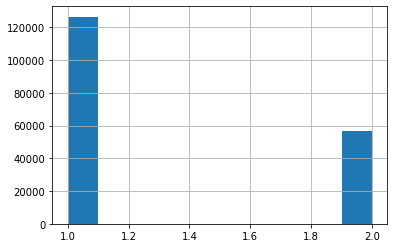

In [42]:
final_df['SEVERITYCODE'].hist()

In [43]:
final_df['SEVERITYCODE'].value_counts()

1    126577
2     56728
Name: SEVERITYCODE, dtype: int64

As we can see, we are dealing with an imbalanced data set on the feature. For that, we will need a technique to balance that dataset, for that we will be using the SMOTE (Synthetic Minority Oversampling Technique) algorithm.

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [45]:
x_train_smote, y_train_smote = smote.fit_sample(x_train.astype('float'),y_train)

In [48]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({1: 88638, 2: 39675})
After SMOTE : Counter({1: 88638, 2: 88638})


Now that we have a balanced features count, we can start modeling.

# Modeling

In [49]:
from sklearn.neighbors import KNeighborsClassifier
k = 5  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(x_train_smote,y_train_smote)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [50]:
Ks = 15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(x_train_smote,y_train_smote)
    yhat = kNN_model.predict(x_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.67369799, 0.71614053, 0.69026404, 0.71077611, 0.69984725,
       0.71395839, 0.70624818, 0.7244872 , 0.70562991, 0.72454175,
       0.70362962, 0.7221414 , 0.71541315, 0.7202684 ])

Here we made test for accuracy score for Ks from 1 to 15.

In [56]:
from sklearn import decomposition, datasets
from sklearn import tree   
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

 # Create an scaler object
sc = StandardScaler()

# Create a logistic regression object with an L2 penalty
decisiontree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('sc', sc), ('decisiontree', decisiontree)])

max_depth = [4,6,8,10,12,14,16]

parameters = dict(decisiontree__max_depth=max_depth)

# Create a grid search object
clf = GridSearchCV(pipe, parameters)

# Fit the grid search
clf.fit(x_train_smote, y_train_smote)

print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])

Best max_depth: 16


In order to make a good desicion tree, we need to find the best maximum depth of out tree. For that, we decided to make a grid search in order to get the best max depth paramater.

In [67]:
from sklearn.tree import DecisionTreeClassifier
DesicionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 16)
DesicionTree.fit(x_train_smote,y_train_smote)
DesicionTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(x_train_smote, y_train_smote)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
from sklearn import linear_model
C = np.logspace(0, 4, num=10)
hyperparameters = dict(C=C)
logistic = linear_model.LogisticRegression()
gridsearch = GridSearchCV(logistic, hyperparameters)
best_model_grid = gridsearch.fit(x_train_smote, y_train_smote)
print(best_model_grid.best_estimator_)

LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


We did a grid search to find the best C parameter for our Logistic Regression model.

In [125]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=21).fit(x_train_smote,y_train_smote)
LogReg

LogisticRegression(C=21, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Evaluation

In [76]:
!pip install sklearn

  Stored in directory: C:\Users\Ivan\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [83]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [85]:
kNN_yhat = kNN_model.predict(x_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, kNN_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, kNN_yhat, average='weighted') )

KNN Jaccard index: 0.72
KNN F1-score: 0.71


In [87]:
DT_yhat = DesicionTree.predict(x_test)
print("Desicion Tree Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("Desicion Tree F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )


Desicion Tree Jaccard index: 0.67
Desicion Tree F1-score: 0.68


In [90]:
SVM_yhat = SVM.predict(x_test)
print("Support Vector Machine Jaccard Index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("Support Vector Machine F1-score: %.2f" % f1_score(y_test, SVM_yhat, average = 'weighted'))

Support Vector Machine Jaccard Index: 0.66
Support Vector Machine F1-score: 0.68


In [126]:
LR_yhat = LogReg.predict(x_test)
LR_yhat_prob = LogReg.predict_proba(x_test)
print("Logistic Regression Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("Logistic Regression F1-score: %2.f" % f1_score(y_test, LR_yhat, average = 'weighted'))
print("Logistic Regression LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

Logistic Regression Jaccard index: 0.66
Logistic Regression F1-score:  1
Logistic Regression LogLoss: 0.55


As we can see, the classifier with better F1 score is the Logistic Regression model, although it could be flawed since the perfect F1 score isn't near Jaccard index. Suggestions are pretty well received.